In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm

In [2]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bank_data.shape, bank_data.dtypes

((5000, 14),
 ID                      int64
 Age                     int64
 Experience              int64
 Income                  int64
 ZIP Code                int64
 Family                  int64
 CCAvg                 float64
 Education               int64
 Mortgage                int64
 Personal Loan           int64
 Securities Account      int64
 CD Account              int64
 Online                  int64
 CreditCard              int64
 dtype: object)

In [4]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
# The 5 point summary says we have rows with experience as negative value which is not correct, lets find out the 
# count of such rows.
len(bank_data[bank_data['Experience']<0])

52

In [6]:
# There are 52 rows with experience as negative value, lets impute those rows with 0 (Assuming negative experience as 
# zero experience)
bank_data['Experience'] = np.where(bank_data['Experience']<0, 0, bank_data['Experience'])

In [7]:
len(bank_data[bank_data['Experience']<0])

0

In [8]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Exploratory Data Analysis

In [10]:
for col in bank_data.columns:
    print('Unique values of the column: {}'.format(col))
    print(bank_data[col].unique())
    

Unique values of the column: ID
[   1    2    3 ... 4998 4999 5000]
Unique values of the column: Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Unique values of the column: Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22  0 34 38 40 33  4 42 43]
Unique values of the column: Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 16

In [11]:
# Construct categorical columns array by looking at the unique values of each column
categorical_columns = ['Education', 'Securities Account', 'CD Account', 'CreditCard', 'Personal Loan', 'Online' ]

In [12]:
# Find the number of people that have NO mortgage
len(bank_data[bank_data['Mortgage']==0])

3462

In [13]:
# Find the number of people with zero credit card spending per month
len(bank_data[bank_data['CCAvg']==0])

106

In [14]:
# Find the number of people that uses online
bank_data['Online'].sum()

2984

In [15]:
# Value counts of categorical columns
for col in categorical_columns:
    print(bank_data[col].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64


# Univariate Analysis

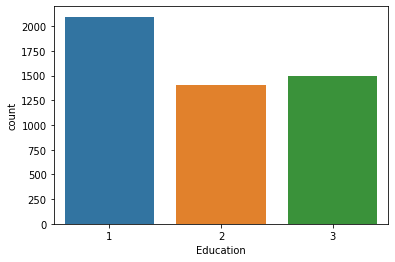

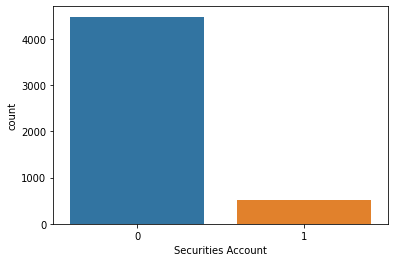

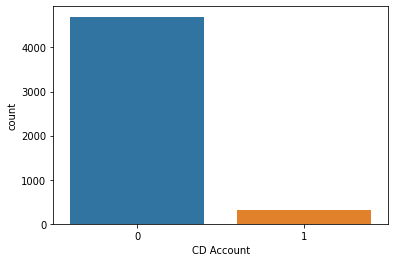

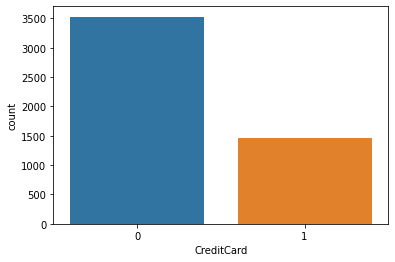

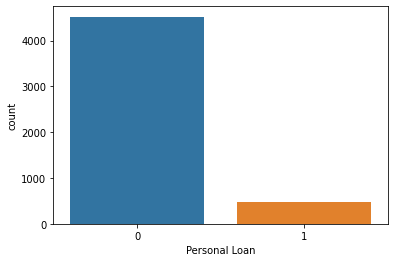

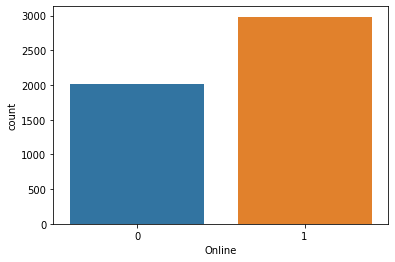

In [16]:
for col in categorical_columns:    
    sns.countplot(bank_data[col])
    plt.show()

# Bivariate Analysis

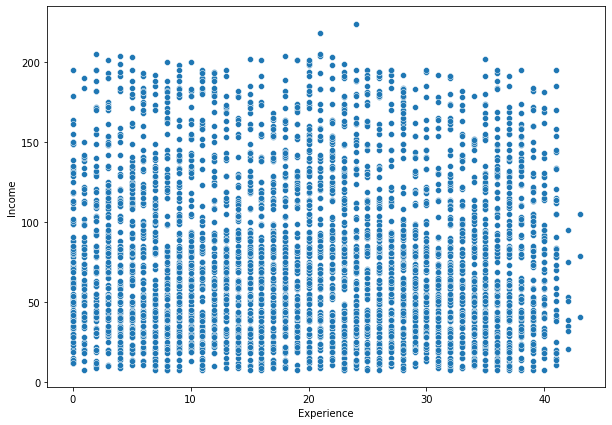

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(bank_data['Experience'], bank_data['Income'])
plt.show()

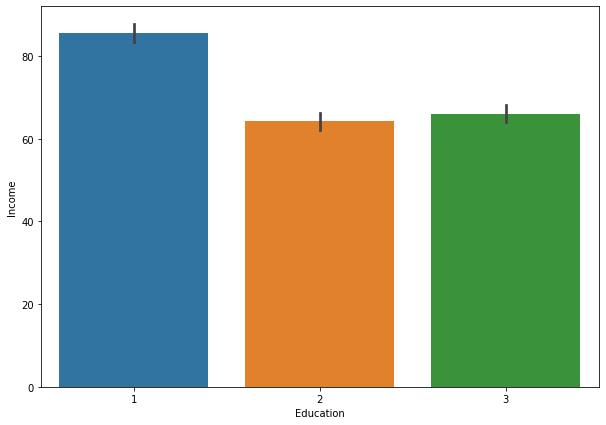

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(bank_data['Education'], bank_data['Income'])
plt.show()

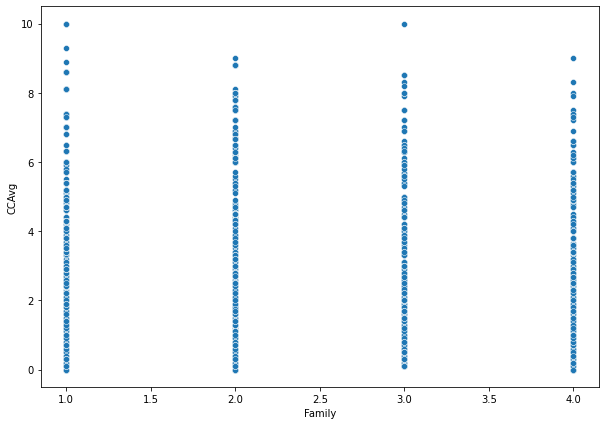

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(bank_data['Family'], bank_data['CCAvg'])
plt.show()

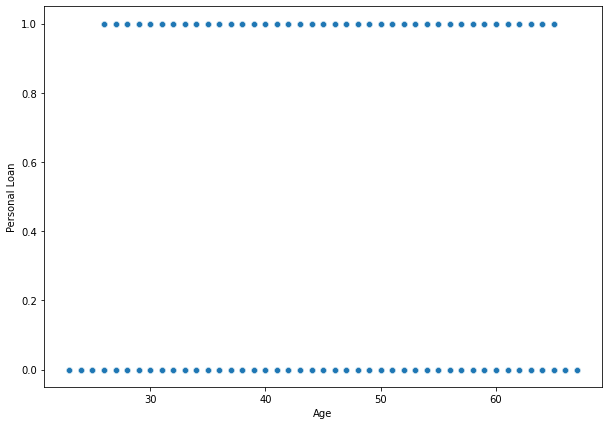

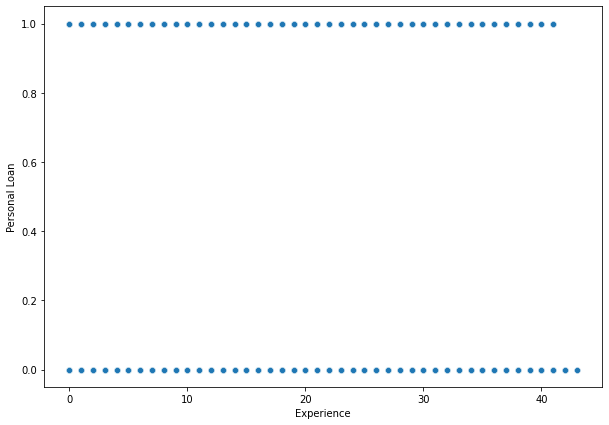

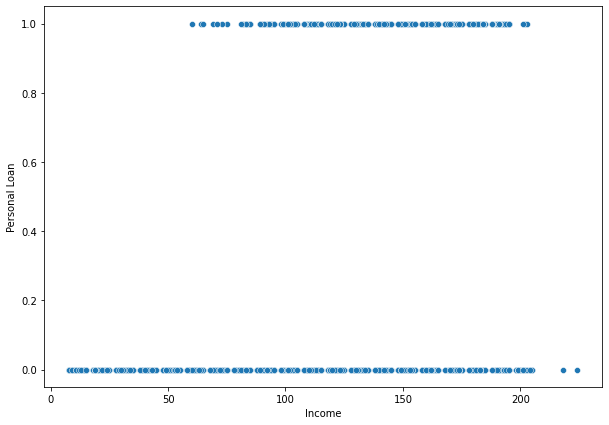

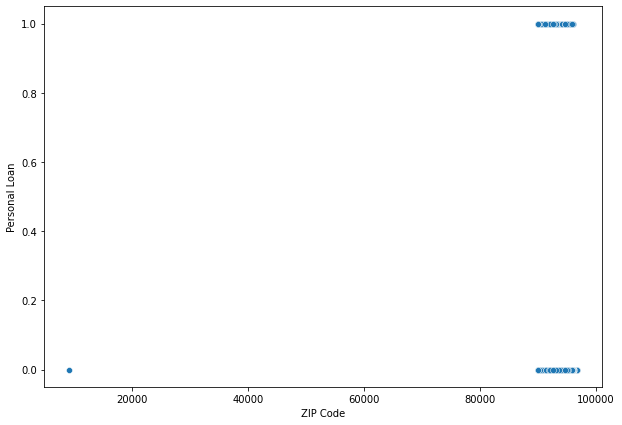

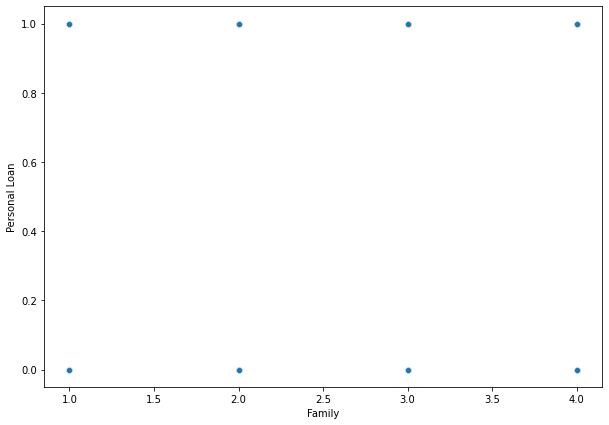

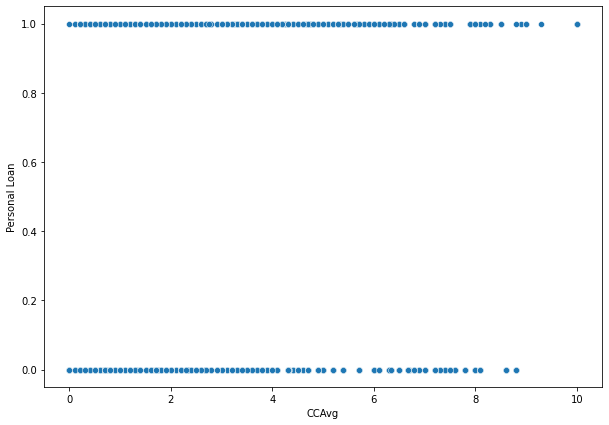

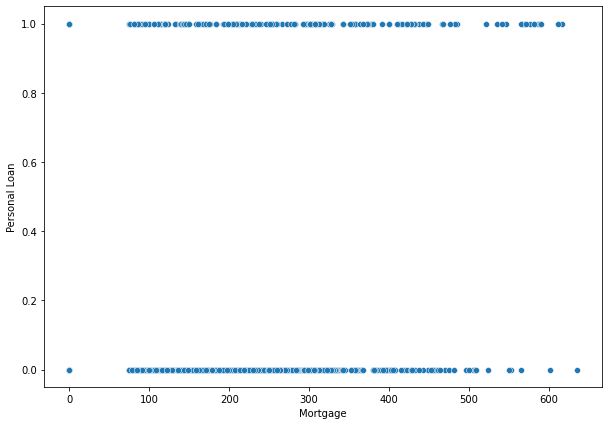

In [20]:
columns = [col for col in bank_data.columns if col not in categorical_columns]
for col in columns[1:]:
    plt.figure(figsize=(10,7))
    sns.scatterplot(bank_data[col], bank_data['Personal Loan'])
    plt.show()

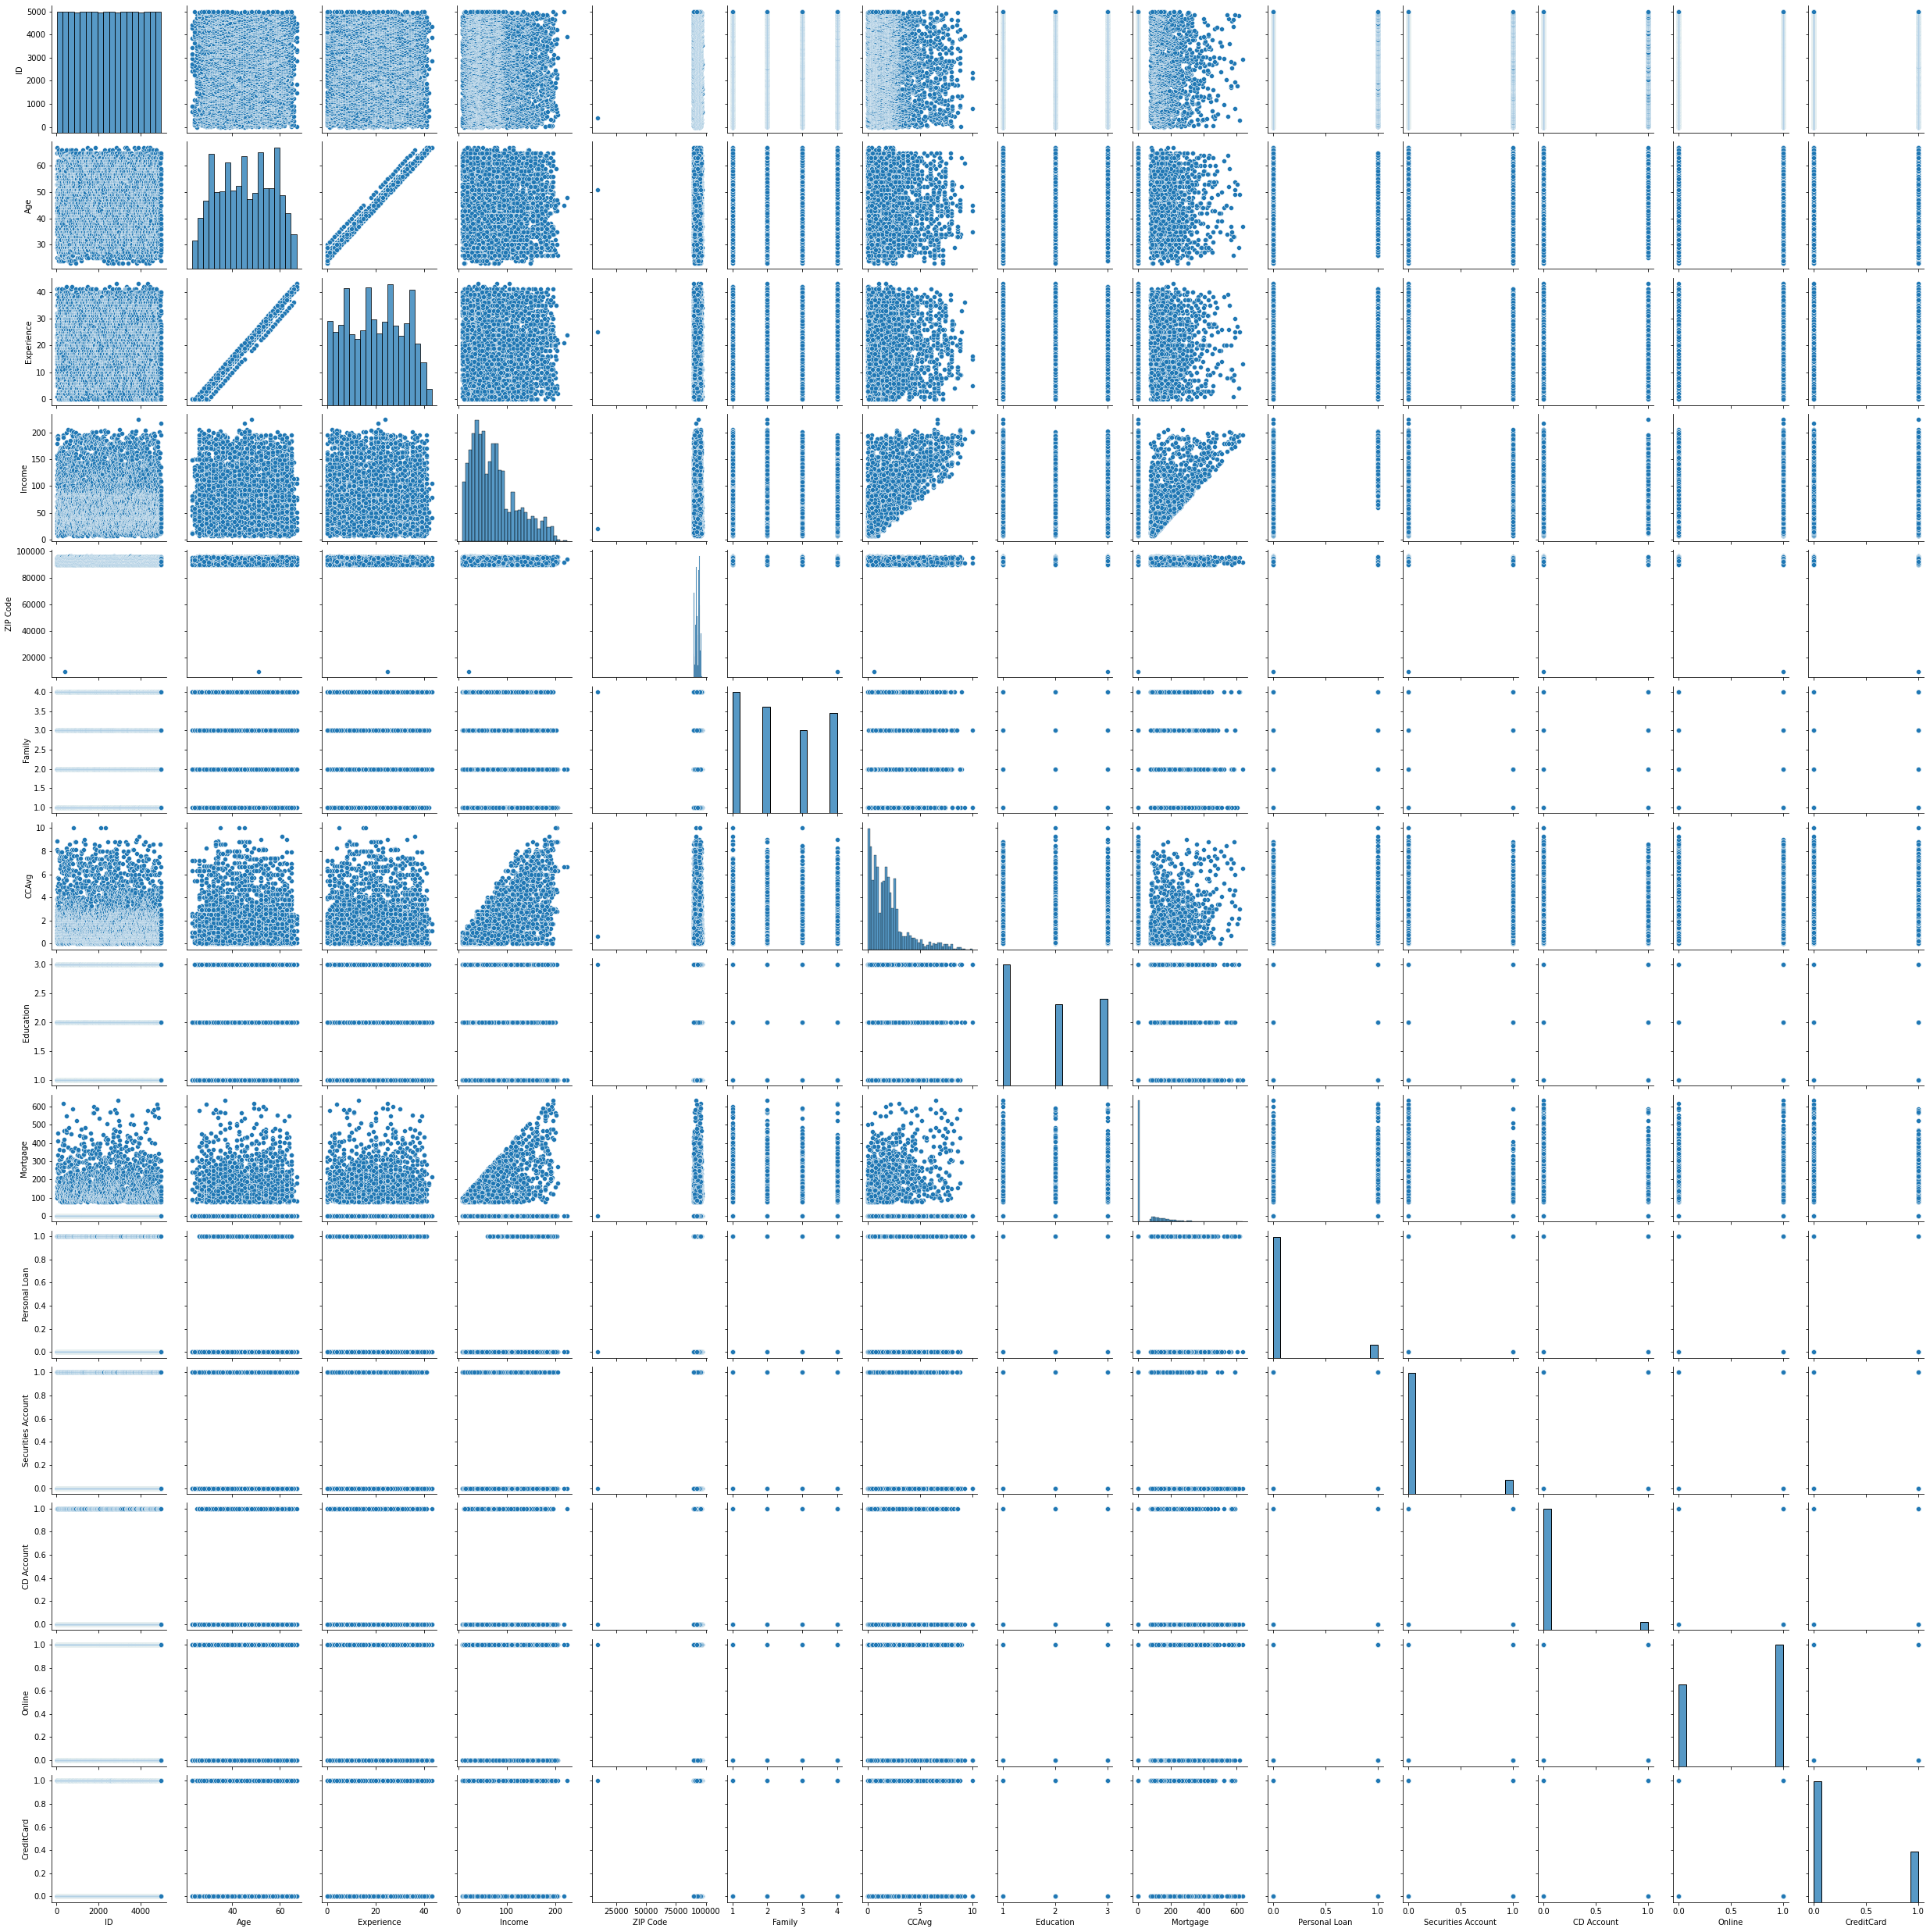

In [21]:
sns.pairplot(bank_data)

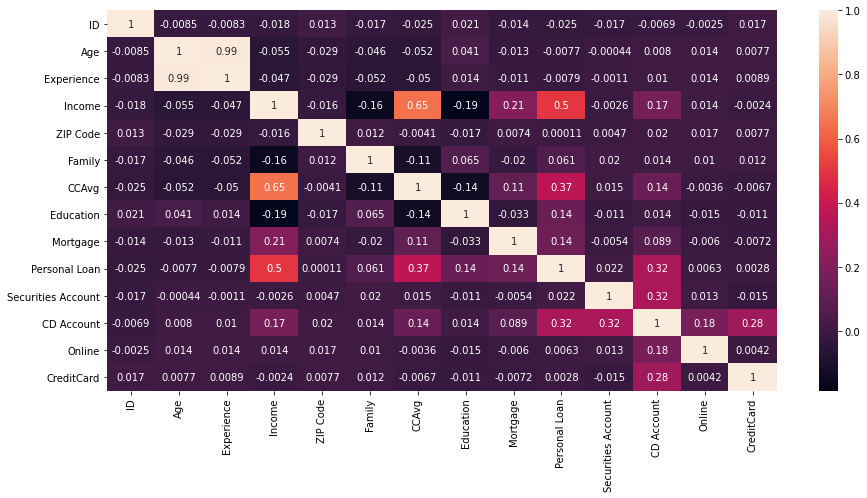

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(bank_data.corr(), annot=True)
plt.show()

In [23]:
noof_personal_loan_subscriptions = len(bank_data[bank_data['Personal Loan']==1])
noof_non_personal_loan_subscriptions = len(bank_data[bank_data['Personal Loan']==0])
print('Percentage of personal loan subscriptions {}'.format((noof_personal_loan_subscriptions)/len(bank_data['Personal Loan'])*100))
print('Percentage of non personal loan subscriptions {}'.format((noof_non_personal_loan_subscriptions)/len(bank_data['Personal Loan'])*100))

Percentage of personal loan subscriptions 9.6
Percentage of non personal loan subscriptions 90.4


# Split Data

In [24]:
X = bank_data.drop(['ID', 'Personal Loan'], axis=1)
y = bank_data['Personal Loan']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

y_train_personal_loan_subscriptions = len(y_train[y_train==1])
y_train_non_personal_loan_subscriptions = len(y_train[y_train==0])

y_test_personal_loan_subscriptions = len(y_test[y_test==1])
y_test_non_personal_loan_subscriptions = len(y_test[y_test==0])

print('Percentage of y_train personal loan subscriptions {}'.format((y_train_personal_loan_subscriptions)/len(y_train)*100))
print('Percentage of y_train non personal loan subscriptions {}'.format((y_train_non_personal_loan_subscriptions)/len(y_train)*100))

print('Percentage of y_test personal loan subscriptions {}'.format((y_test_personal_loan_subscriptions)/len(y_test)*100))
print('Percentage of y_test non personal loan subscriptions {}'.format((y_test_non_personal_loan_subscriptions)/len(y_test)*100))

Percentage of y_train personal loan subscriptions 9.457142857142857
Percentage of y_train non personal loan subscriptions 90.54285714285714
Percentage of y_test personal loan subscriptions 9.933333333333334
Percentage of y_test non personal loan subscriptions 90.06666666666666


# In the train and test data there are only 9% of the people who accepted the personal loan and 90% of the people did not accept the personal loan. The data is imbalanced, there is a posibility that our prediction could be biased. So using SMOTE for oversampling

In [26]:
from imblearn.over_sampling import SMOTE

over_sampling = SMOTE(random_state=1)
X_train_columns = X_train.columns

print('y_train sample size before over sampling {}'.format(len(y_train)))
print("\n")
os_data_X, os_data_y = over_sampling.fit_sample(X_train, y_train)

os_data_y_subscriptions = len(os_data_y[os_data_y==1])
os_data_y_non_subscriptions = len(os_data_y[os_data_y==0])

print('X_train sample size after over sampling {}'.format(len(os_data_X)))
print('y_train sample size after over sampling {}'.format(len(os_data_y)))
print("\n")
print('y train Percentage of subscriptions post SMOTE {}'.format((os_data_y_subscriptions)/len(os_data_y)*100))
print('y train Percentage of non subscriptions post SMOTE {}'.format((os_data_y_non_subscriptions)/len(os_data_y)*100))

y_train sample size before over sampling 3500


X_train sample size after over sampling 6338
y_train sample size after over sampling 6338


y train Percentage of subscriptions post SMOTE 50.0
y train Percentage of non subscriptions post SMOTE 50.0


In [27]:
logit_reg = LogisticRegression(solver='liblinear')
logit_reg.fit(os_data_X, os_data_y)

LogisticRegression(solver='liblinear')

In [28]:
y_predict = logit_reg.predict(X_test)
len(y_predict[y_predict==0])/len(y_predict), len(y_predict[y_predict==1])/len(y_predict)
len(y_test[y_test==0]), len(y_test[y_test==1])

(1351, 149)

In [29]:
confusion_matrix = cm(y_test, y_predict)
confusion_matrix

array([[1194,  157],
       [  24,  125]])

In [30]:
def calculate_conf_matrix_values(y_test, y_predict):
    tp, fp, fn, tn = 0,0,0,0
    y_test_array = y_test.to_numpy()
    for i in range(len(y_test)):
        if (y_test.iloc[i] == 1 and y_predict[i] == 1):
            tp+=1
        elif (y_test.iloc[i] == 0 and y_predict[i] == 1):
            fp+=1
        elif (y_test.iloc[i] == 1 and y_predict[i] == 0):
            fn+=1
        else:
            tn+=1
    return tp, fp, fn, tn

In [31]:
tp, fp, fn, tn = calculate_conf_matrix_values(y_test, y_predict)
print('TP: {}'.format(tp)+' FP: {}'.format(fp)+ ' FN: {}'.format(fn)+ ' TN: {}'.format(tn))
def rearrange_conf_matrix(con_matrix):
    temp = con_matrix.copy()
    for i in range(len(con_matrix)):
        for j in range(len(con_matrix)):
            if i==j:
                if i==0:
                    con_matrix[i][j] = temp[1][1]
                else:
                    con_matrix[i][j] = temp[0][0]
    return con_matrix
confusion_matrix = rearrange_conf_matrix(confusion_matrix)
confusion_matrix

TP: 125 FP: 157 FN: 24 TN: 1194


array([[ 125,  157],
       [  24, 1194]])

# We have [1194 + 125] correct predictions and [157 + 24] in correct predictions

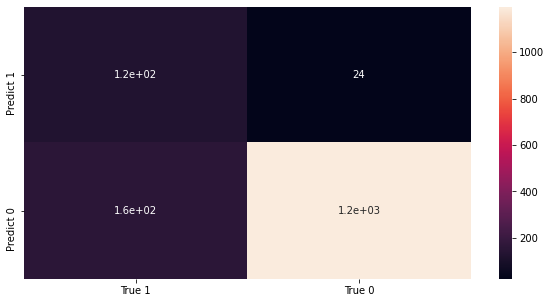

In [40]:
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['True 1', 'True 0'],index=['Predict 1', 'Predict 0'])
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix_df, annot=True)
plt.show()

In [33]:
def accuracy(tp,fp,fn,tn):
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    return accuracy

print('Accuracy of the model: {}'.format(accuracy(tp,fp,fn,tn)))

Accuracy of the model: 0.8793333333333333


In [34]:
def recall(tp, fn): 
    if tp == 0 and fn == 0:
        return 0
    recall = tp/(tp+fn)
    return recall

print('Recall/Sensitivity of the model: {}'.format(recall(tp,fn)))

Recall/Sensitivity of the model: 0.8389261744966443


In [35]:
def precession(tp,fp):  
    if tp == 0 and fp == 0:
        return 0
    precession = tp/(tp+fp)
    return precession

print('Precession of the model: {}'.format(precession(tp,fp)))

Precession of the model: 0.4432624113475177


In [36]:
def f1score(tp,fp,fn):
    p = precession(tp,fp)
    r = recall(tp,fn)
    if p == 0 and r == 0:
        return 0
    f1score = (2 * p * r) / (p + r)
    return f1score

print('F1 Score of the model: {}'.format(f1score(tp,fp,fn)))

F1 Score of the model: 0.580046403712297


In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_score = roc_auc_score(y_test, y_predict)
print('The model roc auc score: {}'.format(roc_auc_score))

The model roc auc score: 0.861357979920417


In [38]:
coefficient_df = pd.DataFrame(logit_reg.coef_, columns=X_train_columns)
coefficient_df['interceptor'] = logit_reg.intercept_
coefficient_df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,interceptor
0,-0.068506,0.060959,0.056076,-0.00007,0.469657,0.284648,0.948861,0.000083,-2.556646,3.180598,-1.092445,-2.037519,-0.637804


In [39]:
diff_of_prediction_vs_actual = (y_predict - y_test)
indexes_of_incorrect_predictions = diff_of_prediction_vs_actual[diff_of_prediction_vs_actual != 0].index
print('Test data where the prediction class is not equal to observed class')
X_test[X_test.index.isin(indexes_of_incorrect_predictions)]

Test data where the prediction class is not equal to observed class


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2775,38,13,163,95039,1,4.1,1,0,0,0,0,0
1513,45,21,183,95211,2,1.4,1,354,0,0,0,0
3347,65,41,78,92109,3,2.0,3,0,0,1,1,1
3271,52,27,93,90291,4,4.1,2,0,0,0,0,1
636,40,16,120,92037,2,6.1,1,196,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4563,28,2,188,92350,2,4.5,1,0,1,0,1,0
3203,44,20,119,92677,2,7.5,1,239,0,0,1,0
1163,34,9,138,94720,2,7.8,1,227,0,0,1,0
3641,59,35,74,94402,4,2.3,3,0,0,0,0,0


In [40]:
customers_who_accepts = y_predict[y_predict==1]
print('Estimated percentage of that will accept the personal loan {}'.format((len(customers_who_accepts)/len(y_predict)*100)))

Estimated percentage of that will accept the personal loan 18.8
